In [0]:
import pandas as pd

In [0]:
posts = pd.read_csv("/content/drive/My Drive/Mldata/posts.csv")
users = pd.read_csv("/content/drive/My Drive/Mldata/users.csv")
views = pd.read_csv("/content/drive/My Drive/Mldata/views.csv")

In [3]:
posts.head()

,_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


In [4]:
users.head()

,_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate


In [5]:
views.head()

,user_id,post_id,timestamp
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z


In [6]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         493 non-null    object
 1   title       493 non-null    object
 2   category    465 non-null    object
 3    post_type  493 non-null    object
dtypes: object(4)
memory usage: 15.5+ KB


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   _id        118 non-null    object
 1   name       118 non-null    object
 2   gender     118 non-null    object
 3   academics  118 non-null    object
dtypes: object(4)
memory usage: 3.8+ KB


In [8]:
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1449 non-null   object
 1   post_id    1449 non-null   object
 2   timestamp  1449 non-null   object
dtypes: object(3)
memory usage: 34.1+ KB


In [9]:
len(posts._id.unique())

493

In [10]:
len(views.post_id.unique())

495

In [11]:
len(users._id.unique())

118

In [12]:
len(views.user_id.unique())

118

In [0]:
posts['pid'] = posts.index

In [0]:
posts.rename(columns = {'_id':'post_id'}, inplace = True)

In [15]:
posts.head(2)

,post_id,title,category,post_type,pid
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog,0
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog,1


In [0]:
users['uid'] = users.index

In [0]:
users.rename(columns = {'_id':'user_id'}, inplace = True)

In [18]:
users.head(2)

,user_id,name,gender,academics,uid
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate,0
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate,1


In [0]:
views_1 = pd.merge(views, posts, on = 'post_id')

In [20]:
views_1.tail()

,user_id,post_id,timestamp,title,category,post_type,pid
1442,5d60098a653a331687083238,5e294fd1c85ab714a7da6643,2020-03-27T08:41:13.123Z,Personal growth,Mass Media|International Relations,blog,36
1443,5d610ae1653a331687083239,5e7c78fdcfc8b713f5ac7daa,2020-03-26T22:23:15.619Z,Types Of AI.,Computer Technology|Artificial Intelligence,blog,170
1444,5d60098a653a331687083238,5dc065ca24b883670268772f,2020-03-26T19:10:26.525Z,Colours of pushkar.,Photography,artwork,21
1445,5d60098a653a331687083238,5e7a5ebdcfc8b713f5ac7d7f,2020-03-26T19:05:50.403Z,I won the Art.,Conceptual,artwork,158
1446,5d60098a653a331687083238,5e7a629ccfc8b713f5ac7d84,2020-03-26T19:01:42.384Z,3D composition.,Tapestry,artwork,163


In [0]:
views_2 = pd.merge(views_1, users, on = 'user_id')

In [22]:
views_2.tail()

,user_id,post_id,timestamp,title,category,post_type,pid,name,gender,academics,uid
1442,5e822b86a3258347b42f2360,5e823908a3258347b42f2368,2020-03-30T18:24:27.151Z,Oliveres mediterrànies,Geography|Physical Geography,blog,203,Rossend Bonàs MIró,male,graduate,37
1443,5e822b86a3258347b42f2360,5e7304761b24db0468e90ce7,2020-03-30T18:27:51.026Z,Textile And Apparel Testing,Fashion Desigining|Fashion Textile|Fashion Man...,blog,132,Rossend Bonàs MIró,male,graduate,37
1444,5e5855ced701ab08af792b51,5e7bd922cfc8b713f5ac7da9,2020-03-26T21:39:16.764Z,What sports will look like in the future,Computer Technology|Robotics|Data Science|Info...,blog,169,Isis Amador,female,undergraduate,25
1445,5e7def80a3258347b42f2124,5e7b8764cfc8b713f5ac7da2,2020-03-27T12:33:42.341Z,Inside life,Drawings,artwork,168,Massimo Puppo,male,undergraduate,35
1446,5e7def80a3258347b42f2124,5dd1751db802e41ed198b680,2020-03-27T12:26:18.624Z,Marital Rape - Rape is Rape,Empowerment,blog,22,Massimo Puppo,male,undergraduate,35


In [0]:
views_f = views_2[['pid','uid']].copy()

In [24]:
views_f.tail()

,pid,uid
1442,203,37
1443,132,37
1444,169,25
1445,168,35
1446,22,35


In [0]:
posts.fillna(" ",inplace=True)

In [26]:
posts[' post_type'].value_counts()

artwork    241
blog       198
skill       27
project     27
Name:  post_type, dtype: int64

In [0]:
posts['content'] = posts['title'] + " " + posts['category'] + " " + posts[' post_type']

In [0]:
posts['content'] = posts['content'].str.replace('|',' ')

In [29]:
posts.head()

,post_id,title,category,post_type,pid,content
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog,0,hello there Plant Biotechnology blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog,1,Ml and AI Artificial Intelligence Machine Lear...
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog,2,What is an Operating System ? Operating System...
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork,3,Lord Shiva Drawings artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog,4,How Competition law evolved? Competition Laws ...


In [0]:
#posts.drop(['category',' post_type','post_id'], 1, inplace=True)

In [0]:
#posts.shape

In [0]:
#posts.info()

In [0]:
import numpy as np
import sys
import pickle

## **Content Latent Matrix**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(posts['content'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=posts.index.tolist())

In [35]:
tfidf_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993
488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.403124,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.321471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
tfidf_df.shape

(493, 994)

In [0]:
#Dimensionality Reduction

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix = svd.fit_transform(tfidf_df)

In [0]:
import matplotlib.pyplot as plt

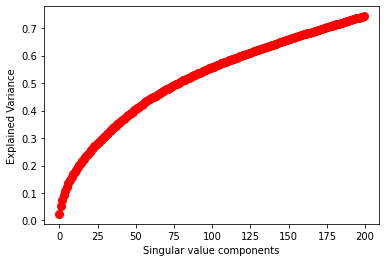

In [39]:
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 10)
plt.ylabel('Explained Variance', fontsize=10)        
plt.show()

In [0]:
#Since more than 70% of the variance is explained by 200 components, 
#we will proceed with the model in order to reduce computational complexity.
n = 200 
latent_matrix_content_df = pd.DataFrame(latent_matrix[:,0:n], index=posts.title.tolist())

In [41]:
# our content latent matrix:
latent_matrix_content_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
hello there,0.003213,0.064178,0.005674,0.003667,-0.002920,0.017022,0.001481,0.003738,0.074535,-0.143113,0.018736,-0.001010,0.007883,0.050152,-0.034620,-0.089950,0.001952,-0.075368,-0.018045,-0.024670,0.016240,-0.005497,-0.034001,0.147674,0.130203,-0.012013,0.049408,-0.125300,0.086938,-0.036213,0.011787,-0.075654,0.117191,0.507862,-0.010038,-0.091489,-0.051220,0.120663,-0.054112,0.061969,...,-0.003889,-0.096359,-0.020418,0.037498,-0.016424,-0.006597,0.048399,-0.033237,-0.000535,-0.006635,-0.032758,-0.056559,0.072322,0.036175,-0.044143,-0.033592,0.048351,0.007516,-0.048428,-0.000141,0.010284,0.035832,-0.032636,-0.050952,0.019574,-0.015212,-0.017836,-0.001697,0.041796,-0.012345,-0.021870,-0.031666,0.031853,-0.066532,0.009493,-0.047239,0.017816,-0.030466,-0.032455,-0.034230
Ml and AI,0.007142,0.411360,-0.015162,-0.011407,-0.001339,0.002041,-0.010003,0.039870,0.117436,0.022366,0.420484,-0.090551,-0.047910,-0.026967,0.035553,0.073547,0.017241,0.008873,0.030253,-0.027724,-0.132029,0.004063,0.024545,-0.012857,-0.161445,0.011924,-0.122145,0.083370,-0.087455,0.202216,0.104164,0.037672,0.312230,0.033239,-0.053662,0.084490,-0.030378,-0.004534,0.050644,-0.093778,...,-0.009592,-0.008636,0.003254,0.003814,0.014028,-0.013519,0.012649,-0.009858,-0.000967,-0.002563,0.007351,-0.000521,0.000855,-0.008621,0.005285,-0.000020,-0.004325,-0.005749,-0.008219,-0.003272,-0.007024,0.004281,-0.006423,-0.007150,-0.000827,0.010349,0.011348,0.000497,-0.002383,-0.010436,0.005282,-0.001302,-0.012807,-0.002845,0.017248,0.008596,-0.001004,0.005581,-0.000099,-0.001693
What is an Operating System ?,0.001894,0.099077,-0.002031,-0.001919,0.002219,0.003331,-0.008535,0.000331,0.028867,-0.080807,-0.013480,-0.005120,0.007518,0.015808,-0.023692,-0.046609,0.012157,-0.026271,-0.012825,0.014658,-0.029075,-0.026008,0.038014,-0.043021,0.177278,-0.049923,0.048235,-0.103265,0.074163,-0.124683,-0.047742,-0.004446,-0.247862,0.025770,0.056820,0.072233,-0.034385,-0.176228,0.105515,-0.115347,...,-0.004963,-0.001054,0.008364,-0.000940,-0.004599,0.001534,0.000977,-0.009913,-0.001673,0.009934,-0.014932,-0.004541,-0.007297,-0.008464,-0.007329,0.006019,0.013064,0.008950,-0.002813,-0.002169,-0.011324,0.006004,-0.000374,-0.007643,0.005365,0.006893,-0.016574,0.022403,0.006507,0.005346,-0.001030,0.020373,0.001406,-0.016238,-0.001072,0.007433,-0.020634,-0.006450,-0.002411,0.008633
Lord Shiva,0.239963,-0.004942,0.198781,-0.290796,-0.031386,-0.230703,-0.006383,-0.076702,0.014711,0.007921,0.013041,0.036392,0.017071,0.048930,-0.065510,0.028309,-0.008189,0.032016,-0.009359,-0.012635,0.001131,-0.006220,0.018635,-0.047111,0.055305,0.085698,-0.043055,-0.111573,0.016313,0.137784,-0.084550,0.056718,0.039801,-0.053848,-0.072440,-0.332244,0.030797,0.020748,0.239193,0.020277,...,0.016733,-0.015120,0.006315,0.015850,0.006495,-0.023936,-0.004301,-0.008457,0.027644,0.004417,-0.005587,-0.021864,-0.000043,-0.018266,0.001393,0.009856,-0.003049,-0.005140,-0.008447,0.006999,-0.012436,0.013075,-0.003348,0.004295,-0.015029,0.033039,0.012126,-0.004104,-0.002120,0.018198,-0.014038,-0.004547,0.007868,0.002657,-0.014031,0.015280,-0.000563,0.026267,0.000156,0.019290
How Competition law evolved?,0.001416,0.049073,0.001442,0.001634,0.003496,0.002925,0.000971,0.008453,0.077550,-0.164960,-0.005294,0.001215,0.008105,0.071972,-0.107001,-0.192386,-0.011554,-0.216336,-0.331216,0.025873,-0.047935,-0.367804,0.197693,0.010850,-0.213516,-0.094474,0.084147,-0.155878,-0.135836,0.007365,0.084683,0.012671,-0.021395,-0.107770,-0.104997,0.001277,-0.084786,0.043409,-0.024886,-0.003641,...,-0.018364,-0.028358,-0.000547,0.013070,-0.037091,0.003781,0.025769,0.001421,0.009001,0.034996,-0.024724,0.014038,0.012820,-0.006485,0.019944,-0.010398,-0.008744,0.009711,-0.002799,-0.0

In [42]:
latent_matrix_content_df.shape

(493, 200)

## **Collaborative Latent Matrix**

In [0]:
views_f['viewed'] = '1'

In [44]:
views_f.tail()

,pid,uid,viewed
1442,203,37,1
1443,132,37,1
1444,169,25,1
1445,168,35,1
1446,22,35,1


In [0]:
views_t1 = pd.merge(posts[['pid']], views_f, on="pid", how="right")

In [46]:
views_t1

,pid,uid,viewed
0,0,0,1
1,1,0,1
2,2,12,1
3,2,73,1
4,3,4,1
...,...,...,...
1442,489,87,1
1443,490,87,1
1444,491,100,1
1445,491,87,1


In [47]:
views_t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1446
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     1447 non-null   int64 
 1   uid     1447 non-null   int64 
 2   viewed  1447 non-null   object
dtypes: int64(2), object(1)
memory usage: 45.2+ KB


In [0]:
views_t1['viewed'] = views_t1['viewed'].astype('int64')

In [0]:
views_t2 = views_t1.pivot_table(index = 'pid', columns ='uid', values = 'viewed').fillna(0)

In [50]:
views_t2.tail()

uid,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117
pid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
489,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [0]:
#Dimensionality Reduction

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=20)
latent_matrix_colab = svd.fit_transform(views_t2)
latent_matrix_colab_df = pd.DataFrame(
                             latent_matrix_colab,
                             index=posts.title.tolist())

In [52]:
latent_matrix_colab_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
hello there,0.629805,-0.652535,-0.366363,-0.030507,0.064577,-0.039685,0.041504,-0.076344,-0.115984,-0.041126,0.052576,0.007324,0.017975,-0.036530,-0.013843,0.011355,-0.010526,0.024108,-0.009268,-0.025794
Ml and AI,0.629805,-0.652535,-0.366363,-0.030507,0.064577,-0.039685,0.041504,-0.076344,-0.115984,-0.041126,0.052576,0.007324,0.017975,-0.036530,-0.013843,0.011355,-0.010526,0.024108,-0.009268,-0.025794
What is an Operating System ?,0.112985,0.178775,-0.094337,0.785808,0.260078,-0.204845,0.305370,0.047781,-0.058907,0.016599,0.067753,0.094634,0.044891,0.054146,-0.166403,0.050347,-0.096042,-0.312108,0.097308,0.115340
Lord Shiva,0.468493,0.568749,-0.365808,1.314306,0.319383,0.062416,-0.302128,-0.035900,0.082694,0.031319,-0.345810,-0.172995,-0.026539,-0.009131,0.059029,-0.219678,0.076827,0.302017,-0.159759,-0.044594
How Competition law evolved?,0.470821,-0.048581,0.776608,0.246604,-0.604972,0.557481,0.336772,-0.087897,-0.045277,-0.050248,-0.075564,0.198602,0.148983,0.290275,-0.116228,-0.080350,0.043467,0.017531,-0.233838,-0.057225


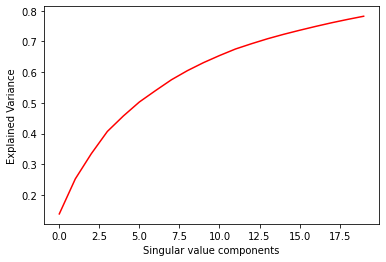

In [53]:
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 10)
plt.ylabel('Explained Variance', fontsize=10)        
plt.show()

## **Running a Content and Collaborative Cosine Similarity**

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

# Latent vectors for a selected title from content and collaborative matrices
a_1 = np.array(latent_matrix_content_df.loc['Lord Shiva']).reshape(1, -1)
a_2 = np.array(latent_matrix_colab_df.loc['Lord Shiva']).reshape(1, -1)

# Similartity of this title with others
score_1 = cosine_similarity(latent_matrix_content_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_colab_df, a_2).reshape(-1)

# Data frame of similar movies 
dictDf = {'content': score_1 , 'collaborative': score_2} 
similar = pd.DataFrame(dictDf, index = latent_matrix_content_df.index )

In [55]:
#Sorting on the basis of Content 

similar.sort_values('content', ascending=False, inplace=True)

similar[1:].head(10)

,content,collaborative
Lord shiva,1.000000,0.594779
Lord shiva (Shadow Drawing),0.795070,0.594779
Shiva Portrait,0.643582,0.000892
You are late.,0.297542,-0.016500
Time,0.295953,0.005375
The legend,0.291331,0.579456
Painting,0.288732,0.004710
Shivshakti,0.283328,-0.003515
Trident,0.277063,0.816359
Shadow Sketch,0.276432,0.594779


In [56]:
#Sorting on the basis of Collaborative

similar.sort_values('collaborative', ascending=False, inplace=True)

similar[1:].head(10)

,content,collaborative
Communication,-0.004601,1.000000
Decision Making with 7 steps !!!,-0.002750,1.000000
OM,0.229785,1.000000
Mahakaal,0.194166,0.901624
Mahakaal,0.004958,0.865864
Armstrong No.(C# .Net),-0.000495,0.865864
Negative or Positive No. (PHP),0.001516,0.864678
Friend Number (C# .Net),-0.008970,0.829897
Trident,0.277063,0.816359
Topology & it's types,0.000157,0.816359


## **Thank You!**